In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



# Any results you write to the current directory are saved as output.

In [2]:
df=pd.read_csv('../input/Salary_Data.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


#We want to predict the salary of the new staff with 
11years experience and 0 year experience

We are going to use 3 algorithms in this tutorial to see which one is the best.

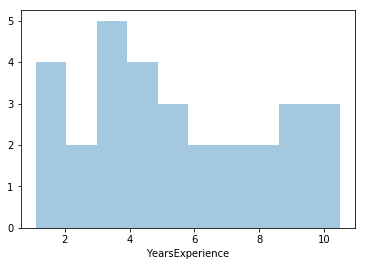

In [4]:
sns.distplot(df['YearsExperience'], kde=False, bins=10)
#this plot is used to visualise distribution

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


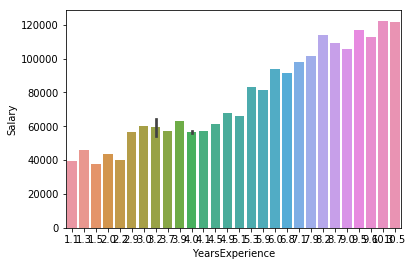

In [5]:
sns.barplot(x='YearsExperience', y='Salary', data=df)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


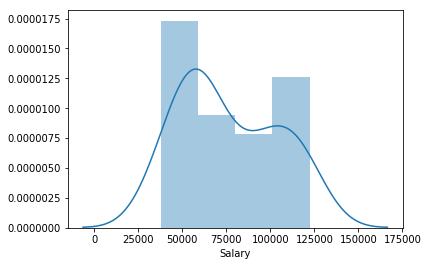

In [6]:
sns.distplot(df.Salary) #lets see the flow of salary 

In [7]:
#Now lets split our data set into training and testing set

In [8]:
x=df.iloc[:, :-1].values
y=df.iloc[:, 1].values

#spiliting to independent and dependent variables

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=1/3, random_state=0)

In [11]:
#let's fit the training data
lr.fit(x_train, y_train)

NameError: name 'lr' is not defined

In [12]:
#Lets create a Linear regresion model 
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [13]:
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

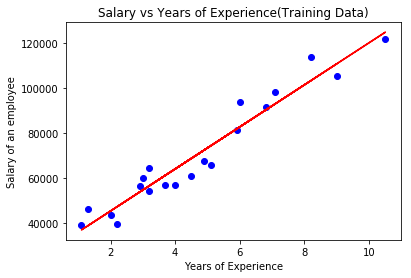

In [14]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train, lr.predict(x_train),color='red')
plt.title('Salary vs Years of Experience(Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

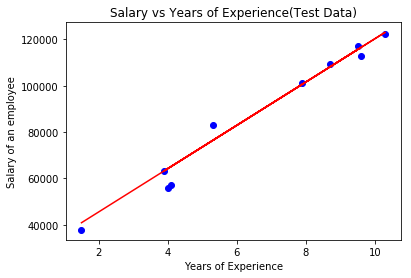

In [15]:
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test, lr.predict(x_test),color='red')
plt.title('Salary vs Years of Experience(Test Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary of an employee')
plt.show()

Let's import other algorithms and check out model accuracy

In [16]:
#Knn Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)
y_predict=knn.predict(x_test)
y_predict

array([39343., 98273., 56957., 56957., 98273., 98273., 98273., 56957.,
       66029., 91738.])

In [17]:
#Svm Clasifier
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_prediction=clf.predict(x_test)
y_prediction

array([ 46205., 121872.,  56957.,  56957., 105582., 105582., 105582.,
        56957.,  66029., 113812.])

In [18]:
#Lets check our model accuracy using r2_score
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)#for svm classifier

0.910000795725282

In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

clf.fit(x_train, y_train)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=2, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
preds = clf.predict(x_test)
print(preds)

[ 46205. 121872.  56957.  56957. 105582. 105582. 105582.  56957.  66029.
 113812.]


In [21]:
r2_score(y_test,preds) #for knn algorithm

0.910000795725282

In [22]:
r2_score(y_test,y_pred)#for linear regression

0.9749154407708353

The best algorithms here is linear regression

Let's predict the Salary of 0 year experience

In [23]:
train_set=df['YearsExperience']
train_labels=df['Salary']

In [24]:
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)

Coefficients:  [9345.94244312]
Intercept:  26816.19224403119
